# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

**Импортируем библиотеку pandas и библиотеку matplotlib. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `data`.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Выводим первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выводим основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Cтроим гистограмму для всех числовых столбцов таблицы.**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

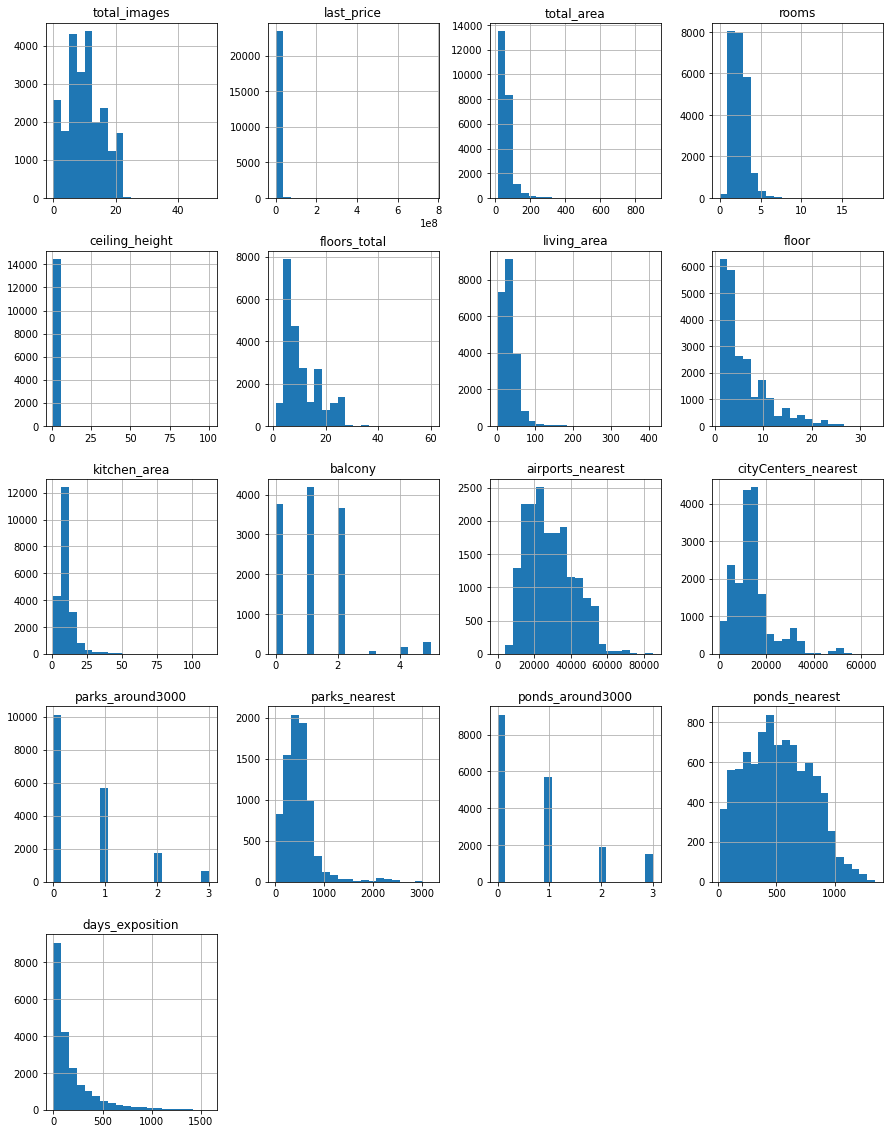

In [4]:
data.hist(figsize=(15, 20), bins=20)

### Выполните предобработку данных

**Выведем количество явных дубликатов в таблице.**

In [5]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Перейдем к поиску пропущенных значений.

**Выведем количество пропущенных значений для каждого столбца.**

In [6]:
display(data.isna().sum().sort_values(ascending=False))

data_relatively = data.isna().sum().sort_values(ascending=False) / 23699
data_relatively

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

В столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, - обнаружены пропуски.
Заполним пропущенные значения там, где это возможно.

Пропущенные значения могли появиться из-за отсутствия значений в данных, например, из-за отсутствия балконов в квартире значение оставили незаполненным.

Так же потеря данных могла произойти из-за технической ошибки на стадии ввода или сохранения данных в базе данных.

Одной из причин отсутствия данных может быть человеческий фактор во время заполнения данных.

Еще одной причиной может быть техническая ошибка при скачивании файла.

In [7]:
#Заменим пропуски в столбце ceiling_height (высоте потолков) медианным значением высоты потолков
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

#Найдем список уникальных значений столбца floors_total (всего этажей в доме), чтобы определить возможные пропуски
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [8]:
#Удалим строки с пропусками в столбце floors_total (всего этажей в доме)
data = data.dropna(subset=['floors_total'])

#Переведем значения в столбце floors_total (всего этажей в доме) в целочисленный тип
data['floors_total'] = data['floors_total'].astype(int)

#Найдем список уникальных значений столбца is_apartment (апартаменты), чтобы определить возможные пропуски
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [9]:
#Заменим пропуски в столбце is_apartment (апартаменты) на значение False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

#Заменим пропуски в столбце balcony (число балконов) на значение 0, и переведем в целочисленный тип
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

#Удалим строки с пропусками в столбце locality_name (название населённого пункта)
data = data.dropna(subset=['locality_name'])

#Заменим пропуски в столбце parks_around3000 (число парков в радиусе 3 км) на значение 0, и переведем в целочисленный тип
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

#Заменим пропуски в столбце ponds_around3000 (число водоёмов в радиусе 3 км) на значение 0, и переведем в целочисленный тип
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Мы заменили некоторые значения столбцов типа `float` на целочисленный тип потому, что они не могут быть дробными. Например число этажей `floors_total` может быть только целочисленным.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

In [11]:
#Выведем уникальные значения столбца locality_name (название населённого пункта)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [12]:
#Устраним неявные дубликаты в столбце locality_name (название населённого пункта)
data_dup = ['поселок Рябово', 'посёлок городского типа Рябово']
data['locality_name'] = data['locality_name'].replace(data_dup, 'поселок городского типа Рябово')
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['посёлок'], 'поселок', regex=True)
)

Мы устранили неявные дубликаты в названиях населенных пунктов с помощью метода `replace`.

### Добавьте в таблицу новые столбцы

In [13]:
#Добавим в таблицу столбец square_meter_price (цена одного квадратного метра) и округлим до двух знаков после точки
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price'] = round(data['square_meter_price'], 2)

#Создаем столбец с датой
data['date'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')#2019-03-07T00:00:00

#Создаем столбец с днём недели
data['day_of_week'] = data['date'].dt.weekday

#Создаем столбец с месяцем
data['month'] = data['date'].dt.month

#Создаем столбец с годом
data['year'] = data['date'].dt.year

#Напишем функцию для определения значения этажа
def floors(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
#Создаем столбец со значением этажа
data['floor_value'] = data.apply(floors, axis=1)

#Создаем столбец с расстоянием до центра в км и округляем до целочисленных значений
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest_km'])

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,date,day_of_week,month,year,floor_value,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,120370.37,2019-03-07,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81.0,82920.79,2018-12-04,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558.0,92785.71,2015-08-20,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.0,424.0,408176.10,2015-07-24,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,100000.00,2018-06-19,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,55.0,95065.79,2018-09-10,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,NaN,155.0,99195.71,2017-11-02,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,0,NaN,NaN,110544.69,2019-04-18,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,NaN,189.0,87454.76,2018-05-23,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.0,88524.59,2017-02-26,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

**1. Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров.**

2159

array([245.4 , 245.8 , 248.  , 248.7 , 249.  , 249.7 , 249.9 , 250.  ,
       250.2 , 250.3 , 251.  , 253.  , 253.7 , 254.  , 255.  , 256.  ,
       257.  , 259.2 , 259.6 , 260.  , 263.8 , 266.2 , 267.7 , 268.  ,
       270.  , 272.6 , 274.  , 274.65, 275.  , 277.6 , 280.  , 280.3 ,
       281.1 , 283.  , 283.3 , 284.  , 285.7 , 287.5 , 288.  , 290.  ,
       290.6 , 292.2 , 293.6 , 295.  , 297.5 , 300.  , 301.9 , 304.  ,
       307.8 , 309.7 , 310.  , 312.  , 313.  , 315.  , 316.3 , 317.  ,
       320.  , 323.  , 327.2 , 336.  , 338.6 , 342.  , 347.  , 347.5 ,
       356.  , 363.  , 363.1 , 364.  , 364.7 , 365.  , 371.  , 373.1 ,
       374.  , 374.6 , 380.  , 398.  , 399.  , 400.  , 401.  , 402.  ,
       410.  , 413.5 , 422.2 , 431.  , 441.98, 460.8 , 470.3 , 483.9 ,
       488.  , 491.  , 494.1 , 495.  , 500.  , 507.  , 517.  , 590.  ,
       618.  , 631.  , 631.2 , 900.  ])

Text(0, 0.5, 'Количество квартир')

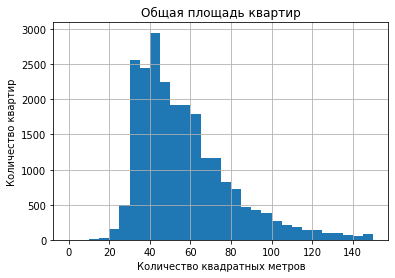

In [14]:
#Изучим столбец total_area на наличие аномальных значений и удалим их
total_area_uniq = data['total_area'].sort_values().unique()
display(len(total_area_uniq))
display(total_area_uniq[len(total_area_uniq) - 100:len(total_area_uniq)])
data = data[data['total_area'] <= 632]

#Изучаем параметр - общая площадь квартир
data['total_area'].hist(bins=30, range=(0, 150))
plt.title('Общая площадь квартир')
plt.xlabel('Количество квадратных метров')
plt.ylabel('Количество квартир')

**Вывод:** Большинство квартир укладывается в диапазон менее 150 квадратных метров. Наибольшее число квартир в 45 квадратных метров. Почти все квартиры больше 150 квадратных метров укладываются в распределение Пуассона, но их слишком мало для репрезентативной выборки.

1769

array([145.4, 145.5, 145.9, 147. , 147.2, 148. , 148.6, 149.4, 150. ,
       150.4, 150.8, 151. , 151.1, 151.4, 151.6, 152. , 153. , 153.9,
       154. , 154.7, 155. , 155.1, 155.5, 157. , 159.2, 159.5, 159.6,
       159.9, 160. , 160.1, 160.6, 161.4, 162. , 163.2, 163.5, 164.3,
       164.7, 165. , 165.5, 166.7, 167. , 168.3, 170. , 170.8, 171. ,
       174. , 174.3, 175. , 176.2, 176.6, 177. , 177.3, 179. , 179.2,
       180. , 181.8, 182. , 182.8, 183. , 183.7, 184. , 184.9, 187. ,
       187.9, 188.7, 189.4, 190. , 193. , 193.5, 194. , 195. , 198. ,
       199. , 200. , 204. , 211. , 216. , 218. , 220. , 222. , 225.9,
       230. , 239.4, 248.5, 248.7, 250. , 255.7, 258. , 260. , 264.5,
       274. , 279.6, 300. , 301.5, 312.5, 322.3, 332. , 347.5, 409. ,
         nan])

Text(0, 0.5, 'Количество квартир')

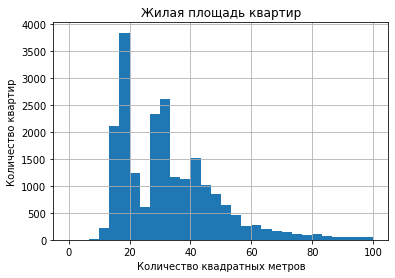

In [15]:
#Изучим столбец living_area на наличие аномальных значений и удалим их
living_area_uniq = data['living_area'].sort_values().unique()
display(len(living_area_uniq))
display(living_area_uniq[len(living_area_uniq) - 100:len(living_area_uniq)])

#Изучаем параметр - жилая площадь квартир
data['living_area'].hist(bins=30, range=(0, 100))
plt.title('Жилая площадь квартир')
plt.xlabel('Количество квадратных метров')
plt.ylabel('Количество квартир')

**Вывод:** На графике жилой площади видны три характерных пика около значений 20, 30 и 40 квадратных метров. Это может быть связано с типовой планировкой помещений. Больше 100 кв.м. жилой площади квартир практически нет.

963

array([ 34.7 ,  34.78,  34.8 ,  35.  ,  35.05,  35.1 ,  35.35,  35.4 ,
        35.5 ,  35.6 ,  35.7 ,  35.9 ,  36.  ,  36.2 ,  36.3 ,  36.4 ,
        36.5 ,  36.6 ,  37.  ,  37.5 ,  37.6 ,  37.7 ,  37.78,  37.8 ,
        37.9 ,  38.  ,  38.1 ,  38.86,  39.  ,  39.1 ,  39.7 ,  39.9 ,
        40.  ,  40.1 ,  40.2 ,  40.3 ,  40.4 ,  40.5 ,  40.7 ,  41.  ,
        41.1 ,  41.3 ,  41.9 ,  42.  ,  42.4 ,  42.5 ,  42.6 ,  42.7 ,
        42.8 ,  43.  ,  43.2 ,  43.4 ,  43.8 ,  44.  ,  44.7 ,  44.9 ,
        45.  ,  45.5 ,  46.  ,  46.8 ,  47.  ,  48.  ,  48.3 ,  48.5 ,
        49.2 ,  49.4 ,  50.  ,  50.2 ,  51.  ,  51.8 ,  53.  ,  53.1 ,
        54.  ,  54.2 ,  54.3 ,  55.5 ,  55.7 ,  56.  ,  56.2 ,  58.  ,
        58.4 ,  60.  ,  62.  ,  62.5 ,  63.  ,  63.4 ,  64.  ,  65.  ,
        66.  ,  70.  ,  72.  ,  75.  ,  77.  ,  87.2 ,  93.  ,  93.2 ,
       100.  , 100.7 , 107.  ,    nan])

Text(0, 0.5, 'Количество квартир')

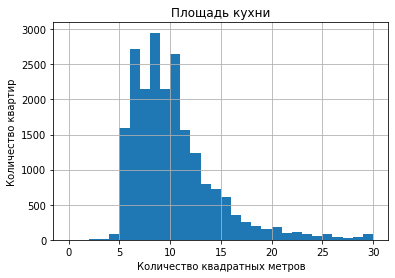

In [16]:
#Изучим столбец kitchen_area на наличие аномальных значений и удалим их
kitchen_area_uniq = data['kitchen_area'].sort_values().unique()
display(len(kitchen_area_uniq))
display(kitchen_area_uniq[len(kitchen_area_uniq) - 100:len(kitchen_area_uniq)])

#Изучаем параметр - площадь кухни
data['kitchen_area'].hist(bins=30, range=(0, 30))
plt.title('Площадь кухни')
plt.xlabel('Количество квадратных метров')
plt.ylabel('Количество квартир')

**Вывод:** На графике видны три пика около значений 6, 8 и 11 кв.м. Скорее всего это связано с типовой застройкой квартир. Больше всего кухонь в диапазоне от 5 до 15 метров. График урладывается в распределение Пуассона, при этом почти нет значений выше 30 кв.м.

2924

array([5.0788000e+07, 5.1000000e+07, 5.2000000e+07, 5.3000000e+07,
       5.3250000e+07, 5.3800000e+07, 5.4000000e+07, 5.5000000e+07,
       5.5800000e+07, 5.5845000e+07, 5.5900000e+07, 5.5969724e+07,
       5.6000000e+07, 5.6844500e+07, 5.7000000e+07, 5.7906000e+07,
       5.8000000e+07, 5.8500000e+07, 5.9000000e+07, 5.9534892e+07,
       5.9800000e+07, 5.9914124e+07, 6.0309900e+07, 6.0999000e+07,
       6.2171920e+07, 6.2316000e+07, 6.3900000e+07, 6.4500000e+07,
       6.4900000e+07, 6.4990000e+07, 6.5000000e+07, 6.5138176e+07,
       6.5850000e+07, 6.6500000e+07, 6.6571000e+07, 6.7000000e+07,
       6.8000000e+07, 6.8500000e+07, 7.1000000e+07, 7.2000000e+07,
       7.2375000e+07, 7.3884056e+07, 7.3900000e+07, 7.4000000e+07,
       7.5000000e+07, 7.6837000e+07, 7.7000000e+07, 7.7349000e+07,
       7.7612080e+07, 7.9000000e+07, 7.9339000e+07, 8.0000000e+07,
       8.1960000e+07, 8.2000000e+07, 8.2400000e+07, 8.3000000e+07,
       8.3820000e+07, 8.4000000e+07, 8.4382000e+07, 8.5000000e

Text(0, 0.5, 'Количество квартир')

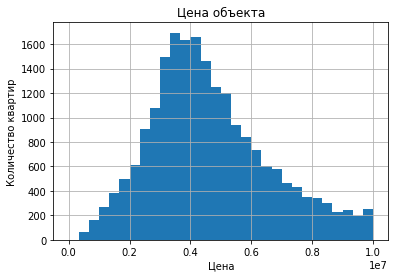

In [17]:
#Изучим столбец last_price на наличие аномальных значений и удалим их
last_price_uniq = data['last_price'].sort_values().unique()
display(len(last_price_uniq))
display(last_price_uniq[len(last_price_uniq) - 100:len(last_price_uniq)])
data = data[data['last_price'] <= 15000000]

#Изучаем параметр - цена объекта
data['last_price'].hist(bins=30, range=(0, 10000000))
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

**Вывод:** На графике видно пиковое значение около 4 миллионов. График укладывается в нормальное распределение. Все значения стоимости выше 10 миллионов можно убрать т.к. их очень мало.

8

array([0, 1, 2, 3, 4, 5, 6, 7])

Text(0, 0.5, 'Количество квартир')

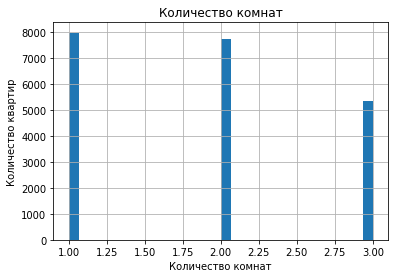

In [18]:
#Изучим столбец rooms на наличие аномальных значений и удалим их
rooms_uniq = data['rooms'].sort_values().unique()
display(len(rooms_uniq))
display(rooms_uniq)
data = data[(data['rooms'] > 0) & (data['rooms'] <= 6)]

#Изучаем параметр - цена объекта
data['rooms'].hist(bins=30, range=(1, 3))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

**Вывод:** В столбце количество комнат чаще всего встречаются значения 1, 2 и 3 комнаты. Квартир с комнатами больше 3 практически нет. Больше всего квартир с одной комнатой, меньше всего - с тремя. 

166

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.3 ,   3.31,   3.32,   3.33,
         3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,
         3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.52,
      

Text(0, 0.5, 'Количество квартир')

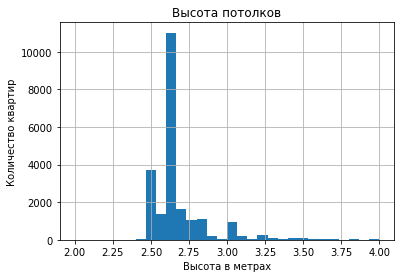

In [19]:
#Изучим столбец ceiling_height на наличие аномальных значений и удалим их
ceiling_height_uniq = data['ceiling_height'].sort_values().unique()
display(len(ceiling_height_uniq))
display(ceiling_height_uniq[0:len(ceiling_height_uniq)])

#Заменим выбивающиеся значения на реальные и удалим аномальные значения
data['ceiling_height'] = data['ceiling_height'].replace(to_replace=24, value=2.4)
data['ceiling_height'] = data['ceiling_height'].replace(to_replace=25, value=2.5)
data['ceiling_height'] = data['ceiling_height'].replace(to_replace=26, value=2.6)
data['ceiling_height'] = data['ceiling_height'].replace(to_replace=27, value=2.7)
data = data[(data['ceiling_height'] >= 2.2) & (data['ceiling_height'] <= 5)]

#Изучаем параметр - высота потолков
data['ceiling_height'].hist(bins=30, range=(2, 4))
plt.title('Высота потолков')
plt.xlabel('Высота в метрах')
plt.ylabel('Количество квартир')

**Вывод:** На графике видно три пика около 2.5, 2.6 и 3 метров. Мы удалили аномальные значения меньше 2.2 и больше 5 метров.
При этом квартир с высотой потолка 2.6 больше, чем всех остальных. Скорее всего это происходит из-за типовой планировки квартир.

array(['другой', 'первый', 'последний'], dtype=object)

Text(0, 0.5, 'Количество квартир')

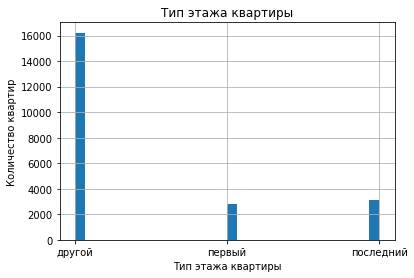

In [20]:
##Изучим столбец floor_value на наличие аномальных значений и удалим их
display(data['floor_value'].unique())

#Изучаем параметр - тип этажа квартиры
data['floor_value'].hist(bins=30)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество квартир')

**Вывод:**

35

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 52,
       60])

Text(0, 0.5, 'Количество квартир')

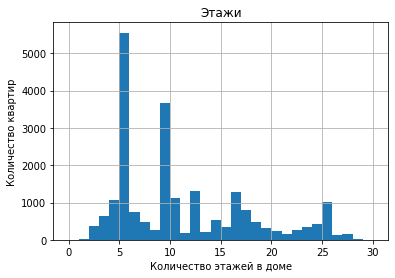

In [21]:
#Изучим столбец floors_total на наличие аномальных значений и удалим их
floors_total_uniq = data['floors_total'].sort_values().unique()
display(len(floors_total_uniq))
display(floors_total_uniq[len(floors_total_uniq) - 100:len(floors_total_uniq)])

#Изучаем параметр - общее количество этажей в доме
data['floors_total'].hist(bins=30, range=(0, 30))
plt.title('Этажи')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')

**Вывод:** На графике видны пики соответствующие типовой застройке, т.е. 5, 9, 12, 16, 25 этажные здания. Больше всего пятиэтажных зданий.

7279

array([51153., 51159., 51175., 51198., 51227., 51308., 51323., 51329.,
       51335., 51337., 51341., 51345., 51353., 51368., 51399., 51401.,
       51410., 51411., 51413., 51415., 51418., 51440., 51500., 51511.,
       51522., 51544., 51626., 51627., 51629., 51677., 51704., 51730.,
       51735., 51772., 51818., 51831., 51849., 51865., 51874., 51879.,
       51891., 51917., 51926., 51982., 52010., 52024., 52073., 52098.,
       52118., 52120., 52136., 52143., 52179., 52206., 52222., 52259.,
       52304., 52328., 52334., 52380., 52628., 52696., 52716., 52717.,
       52768., 52818., 52858., 52895., 52900., 52943., 52968., 52974.,
       53028., 53078., 53088., 53104., 53132., 53138., 53177., 53294.,
       53379., 53383., 53568., 54214., 54490., 54646., 54926., 56745.,
       59052., 59626., 60223., 61495., 62454., 62706., 64857., 65105.,
       65764., 65952., 65968.,    nan])

Text(0, 0.5, 'Количество квартир')

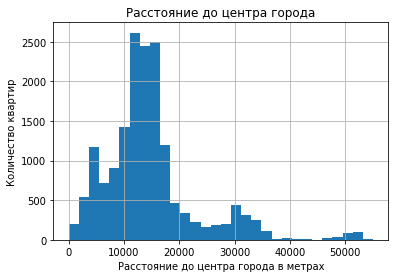

In [22]:
#Изучим столбец cityCenters_nearest на наличие аномальных значений и удалим их
cityCenters_nearest_uniq = data['cityCenters_nearest'].sort_values().unique()
display(len(cityCenters_nearest_uniq))
display(cityCenters_nearest_uniq[len(cityCenters_nearest_uniq) - 100:len(cityCenters_nearest_uniq)])

#Изучаем параметр - расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins=30, range=(0, 55000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')

**Вывод:** На графике виден большой пик около 12000 метров. Большая часть квартир находится в 12 км от центра города. Есть так же небольшие пики в районе 30000 м. и 50000 м.

981

array([1077., 1079., 1086., 1094., 1097., 1098., 1103., 1114., 1120.,
       1133., 1145., 1148., 1150., 1167., 1181., 1186., 1188., 1190.,
       1191., 1199., 1200., 1205., 1211., 1213., 1215., 1228., 1248.,
       1256., 1262., 1264., 1270., 1272., 1299., 1304., 1312., 1326.,
       1342., 1354., 1361., 1362., 1364., 1400., 1416., 1423., 1424.,
       1443., 1477., 1481., 1496., 1499., 1501., 1510., 1514., 1564.,
       1568., 1586., 1596., 1620., 1648., 1657., 1722., 1731., 1756.,
       1767., 1790., 1798., 1802., 1887., 1909., 1942., 1951., 2026.,
       2066., 2102., 2131., 2137., 2209., 2245., 2276., 2295., 2348.,
       2416., 2427., 2467., 2489., 2532., 2555., 2633., 2665., 2711.,
       2747., 2768., 2847., 2880., 2888., 2984., 3013., 3064., 3190.,
         nan])

Text(0, 0.5, 'Количество квартир')

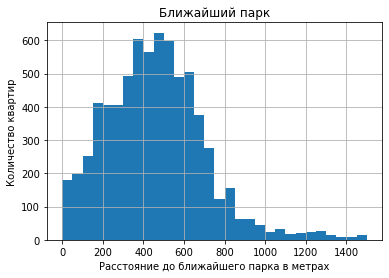

In [23]:
#Изучим столбец parks_nearest на наличие аномальных значений и удалим их
parks_nearest_uniq = data['parks_nearest'].sort_values().unique()
display(len(parks_nearest_uniq))
display(parks_nearest_uniq[len(parks_nearest_uniq) - 100:len(parks_nearest_uniq)])

#Изучаем параметр - расстояние до ближайшего парка
data['parks_nearest'].hist(bins=30, range=(0, 1500))
plt.title('Ближайший парк')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество квартир')

**Вывод:** Больше всего квартир с расстоянием до парка в 500 метров. Чаще всего встречаются парки на расстоянии от 200 м. до 700 м. После 900 м. парков почти нет.

In [24]:
1 - (data['last_price'].count() / 23699)

0.0657411705135238

<div class="alert alert-info">
<b>Доля удаленных данных равна 6.5%.

**2. Изучим, как быстро продавались квартиры.**

Среднее: 177
Медиана: 93


count    19348.000000
mean       176.819516
std        215.547159
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

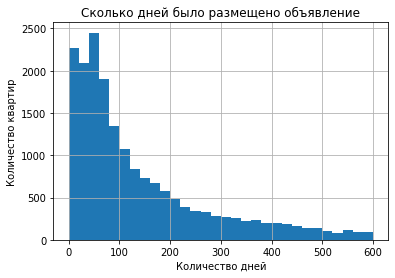

In [37]:
#Вычислим среднее и медиану для столбца days_exposition (сколько дней было размещено объявление)
print('Среднее:', round(data['days_exposition'].mean()))
print('Медиана:', round(data['days_exposition'].median()))

#Построим гистограмму для столбца days_exposition (сколько дней было размещено объявление)
data['days_exposition'].hist(bins=30, range=(0, 600))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
data['days_exposition'].describe()

<div class="alert alert-info">
<b>**Вывод:** Опираясь на квартили определим быстрые и долгие продажи. Чаще всего квартиры продаются за период около 93 дней. Быстрыми можно считать продажи за 44 дней. Медленными можно считать продажи длительнее 225 дней.

**3. Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.**

,Цена на момент снятия с публикации
total_area,
28.66,690000.0
14.00,1190000.0
25.90,1200000.0
29.62,1300000.0
54.33,1300000.0
...,...
157.00,14990000.0
108.80,14990000.0
187.30,15000000.0


Корреляция: 0.7418180020797558


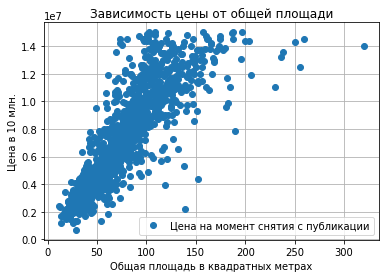

In [26]:
#Построим сводную таблицу зависимости цены от общей площади
price_total_area = data.pivot_table(index='total_area', values='last_price')
price_total_area = price_total_area.sort_values('last_price')
price_total_area.columns = ['Цена на момент снятия с публикации']
display(price_total_area)

#Построим график зависимости цены от общей площади
price_total_area.plot(style='o', grid=True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь в квадратных метрах')
plt.ylabel('Цена в 10 млн.')

#Посчитаем корреляцию цены от общей площади
print('Корреляция:', data['total_area'].corr(data['last_price']))

**Вывод:** Существует высокая положительная корреляция цены от общей площади квартиры: чем больше площадь, тем выше цена.

,Цена на момент снятия с публикации
living_area,
20.97,990000.0
10.94,1550000.0
12.81,1690715.0
18.11,1695000.0
16.31,1700000.0
...,...
94.90,14990000.0
98.90,14990000.0
145.40,15000000.0


Корреляция: 0.6318727705035184


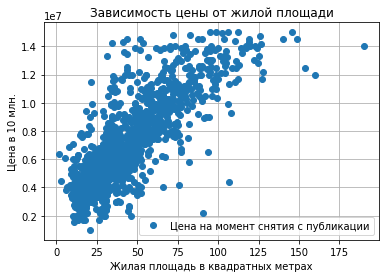

In [27]:
#Построим сводную таблицу зависимости цены от жилой площади
price_living_area = data.pivot_table(index='living_area', values='last_price')
price_living_area = price_living_area.sort_values('last_price')
price_living_area.columns = ['Цена на момент снятия с публикации']
display(price_living_area)

#Построим график зависимости цены от жилой площади
price_living_area.plot(style='o', grid=True)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь в квадратных метрах')
plt.ylabel('Цена в 10 млн.')

#Посчитаем корреляцию цены от жилой площади
print('Корреляция:', data['living_area'].corr(data['last_price']))

**Вывод:** Мы наблюдаем высокую положительную корреляцию. Чем больше жилая площадь, тем больше цена квартиры.

,Цена на момент снятия с публикации
kitchen_area,
40.50,12190.0
5.91,1300000.0
6.73,1718857.0
6.22,1720000.0
5.14,1800000.0
...,...
31.70,14500000.0
34.30,14500000.0
3.70,14948000.0


Корреляция: 0.5342966185883476


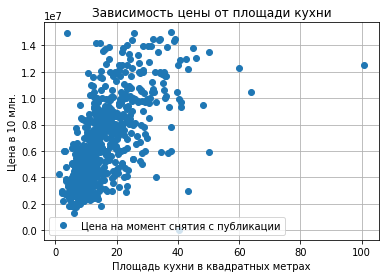

In [28]:
#Построим сводную таблицу зависимости цены от площади кухни
price_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price')
price_kitchen_area = price_kitchen_area.sort_values('last_price')
price_kitchen_area.columns = ['Цена на момент снятия с публикации']
display(price_kitchen_area)

#Построим график зависимости цены от площади кухни
price_kitchen_area.plot(style='o', grid=True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни в квадратных метрах')
plt.ylabel('Цена в 10 млн.')

#Посчитаем корреляцию цены от площади кухни
print('Корреляция:', data['kitchen_area'].corr(data['last_price']))

**Вывод:** Здесь мы так же видим высокую положительную корреляцию, чем больше площадь кухни, тем больше цена.

,Цена на момент снятия с публикации
rooms,
1,3.781534e+06
2,5.191807e+06
3,6.556161e+06
4,7.907017e+06
5,1.018102e+07
6,1.155381e+07


Корреляция: 0.4855867493270532


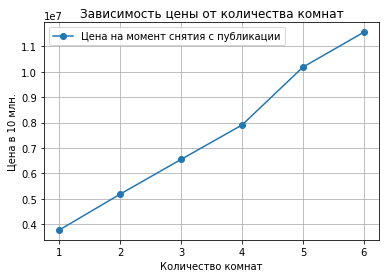

In [29]:
#Построим сводную таблицу зависимости цены от количества комнат
price_rooms = data.pivot_table(index='rooms', values='last_price')
price_rooms = price_rooms.sort_values('last_price')
price_rooms.columns = ['Цена на момент снятия с публикации']
display(price_rooms)

#Построим график зависимости цены от количества комнат
price_rooms.plot(style='o-', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена в 10 млн.')

#Посчитаем корреляцию цены от количества комнат
print('Корреляция:', data['rooms'].corr(data['last_price']))

**Вывод:** Мы видим высокую положительную корреляцию. Чем больше комнат, тем больше цена квартиры.

,Цена на момент снятия с публикации
floor_value,
первый,4.281665e+06
последний,4.842117e+06
другой,5.393115e+06


Text(0, 0.5, 'Цена в 10 млн.')

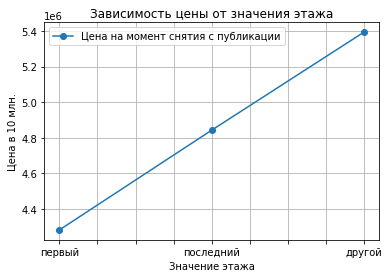

In [30]:
#Построим сводную таблицу зависимости цены от значения этажа
price_floor_value = data.pivot_table(index='floor_value', values='last_price')
price_floor_value = price_floor_value.sort_values('last_price')
price_floor_value.columns = ['Цена на момент снятия с публикации']
display(price_floor_value)

#Построим график зависимости цены от значения этажа
price_floor_value.plot(style='o-', grid=True)
plt.title('Зависимость цены от значения этажа')
plt.xlabel('Значение этажа')
plt.ylabel('Цена в 10 млн.')

**Вывод:** Здесь мы можем видеть, что квартиры на первом этаже в среднем дешевле, чем на остальных. Квартиры на других этажах дороже всего. Последний этаж находится в середине ценового диапазона.

<div class="alert alert-info">
<b>Убрал из столбцов со днем недели, месяцем и годом подсчет коэффициента корреляции Пирсона.

,Цена на момент снятия с публикации
day_of_week,
0,5.176163e+06
1,5.246298e+06
2,5.208271e+06
3,5.195953e+06
4,5.143140e+06
5,5.044942e+06
6,5.082137e+06


Корреляция: -0.01616134554178177


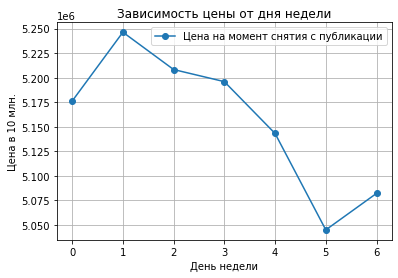

In [31]:
#Построим сводную таблицу зависимости цены от дня недели
price_day_of_week = data.pivot_table(index='day_of_week', values='last_price')
price_day_of_week.columns = ['Цена на момент снятия с публикации']
display(price_day_of_week)

#Построим график зависимости цены от дня недели
price_day_of_week.plot(style='o-', grid=True)
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена в 10 млн.')

**Вывод:** Стоимость жилья выставленного на продажу в субботу самая высокая, а в воскресение - самая низкая среди остальных дней недели.

,Цена на момент снятия с публикации
month,
1,5.138376e+06
2,5.147155e+06
3,5.154972e+06
4,5.273022e+06
5,5.145501e+06
6,4.941048e+06
7,5.166087e+06
8,5.195085e+06
9,5.334782e+06


Корреляция: 0.006944079264899223


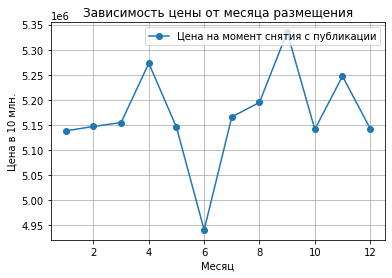

In [32]:
#Построим сводную таблицу зависимости цены от месяца размещения
price_month = data.pivot_table(index='month', values='last_price')
price_month.columns = ['Цена на момент снятия с публикации']
display(price_month)

#Построим график зависимости цены от месяца размещения
price_month.plot(style='o-', grid=True)
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена в 10 млн.')

**Вывод:** Выставленные на продажу в июне квартиры - самые дешевые. Выставленные в декабре - самые дорогие. Корреляции цены от месяца не наблюдается.

,Цена на момент снятия с публикации
year,
2014,6.928793e+06
2015,5.737946e+06
2016,5.140518e+06
2017,5.098022e+06
2018,5.066364e+06
2019,5.457237e+06


Корреляция: -0.016141967457581983


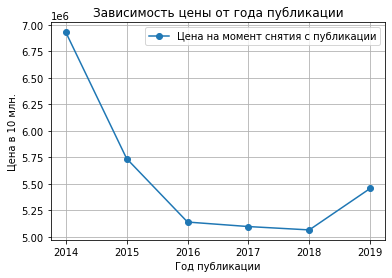

In [33]:
#Построим сводную таблицу зависимости цены от года публикации
price_year = data.pivot_table(index='year', values='last_price')
price_year.columns = ['Цена на момент снятия с публикации']
display(price_year)

#Построим график зависимости цены от года публикации
price_year.plot(style='o-', grid=True)
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена в 10 млн.')

**Вывод:** Дешевле всего квартиры были в 2016-2017 годах. Дороже всего в 2014 году.

**4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [34]:
#Создадим переменную, в которой отсортируем населенные пункты по числу объявлений
data_ten_locality_name = data['locality_name'].value_counts()

#Создадим сводную таблицу
data_square_meter_price = (data.query('locality_name in @data_ten_locality_name.index')
    .pivot_table(index='locality_name', values='square_meter_price')
)

#Отсортируем таблицу по цене за квадратный метр
data_square_meter_price = data_square_meter_price.sort_values(by='square_meter_price', ascending=False)
data_square_meter_price.head(10)

,square_meter_price
locality_name,
Санкт-Петербург,107121.583413
Пушкин,101197.271225
поселок Лисий Нос,100660.816667
Зеленогорск,100636.524091
Сестрорецк,100024.179040
Кудрово,99863.417152
деревня Мистолово,98549.977273
поселок Левашово,96997.690000
Мурино,92479.984848


**Вывод:** Наибольшей является стоимость квадратного метра в Санкт-Петербуре. Скорее всего это происходит потому, что Санкт-Петербург является крупным городом и областным центром. Наименьшая стоимость квадратного метра в Красном Селе.

**5. Вычислим стоимость квартир в Санкт-Петербурге на разном удалении от центра.**

,Цена
cityCenters_nearest_km,
0.0,9.606154e+06
1.0,9.269085e+06
2.0,9.167403e+06
3.0,8.311321e+06
4.0,8.572499e+06
5.0,8.501081e+06
6.0,7.917677e+06
7.0,7.276535e+06
8.0,7.169576e+06


Корреляция: -0.3958923722756406


Text(0.5, 0, 'Расстояние от центра в километрах')

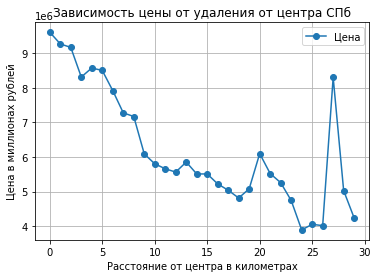

In [35]:
#Построим сводную таблицу зависимости цены квартиры от удаления от центра СПб
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb_price = data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price')
data_spb_price.columns = ['Цена']
display(data_spb_price.head(30))

#Вычислим корреляцию цены квартиры от удаления от центра СПб
print('Корреляция:', data_spb['cityCenters_nearest_km'].corr(data_spb['last_price']))

#Построим график зависимость цены от удаления от центра СПб
data_spb_price.plot(style='o-', grid=True)
plt.title('Зависимость цены от удаления от центра СПб')
plt.ylabel('Цена в миллионах рублей')
plt.xlabel('Расстояние от центра в километрах')

**Вывод:** Существует высокая отрицатьльная корреляция между удалением от центра и ценой квартиры в Санкт-Петербурге. Мы построили график, по которому наглядно видно, что цена в среднем уменьшается при удалении от центра. Существуют аномальные значения на графике: на 20 и 28 километре цена резко подскачила вверх. Скорее всего эти значения являются ценой недвижимости в элитных районах.

### Напишите общий вывод

**Общие выводы из гистограмм:**
- Большее число квартир имеет площадь около 45 квадратных метров.
- Жилая площадь квартир имеет три пика около значений 20, 30 и 40 квадратных метров.
- Площадь кухни имеет три пика около значений 6, 8 и 11 кв.м.
- Средняя стоимость квартиры - 4 млн.
- Однокомнатных квартир больше всего, трехкомнатных меньше всего.
- Квартир с высотой потолка 2.6 больше, чем всех остальных.
- Большая часть квартир находится в 12 км от центра города.
- Чаще всего квартиры продаются за период около 80 дней. Быстрые продажи - до 10 дней. Медленные - свыше 250 дней.

**Факторы, влияющие на полную стоимость:**
- Чем выше площадь квартиры, тем выше её цена.
- Чем больше комнат, тем выше цена.
- Первый этаж дешевле всего, Все этажи кроме последнего дороже всего.

**Стоимость квадратного метра в 10 наиболее населённых пунктах:**
- В Санкт-Петербуре стоимость кв.м. наибольшая. В Красном Селе наименьшая.

**Стоимость квартир на разном удалении от центра СПб.**
- Чем дальше квартира от центра, тем выше в среднем её стоимость.